In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime

In [2]:
#%pip install Faker

In [3]:
hist_comp_madrid_int = pd.read_csv('../../evolucion_precioporm2_madrid_centro.csv')

hist_comp_madrid_int

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5,table__cell 6
0,Febrero 2024,4.268 €/m2,"+ 1,9 %","+ 5,0 %","+ 9,5 %",NaN
1,Enero 2024,4.190 €/m2,"+ 1,7 %","+ 3,1 %","+ 8,2 %",NaN
2,Diciembre 2023,4.118 €/m2,"+ 1,3 %","+ 2,0 %","+ 6,1 %",NaN
3,Noviembre 2023,4.064 €/m2,"+ 1,2 %","+ 3,8 %","0,0 %",NaN
4,Octubre 2023,4.064 €/m2,"+ 0,7 %","+ 1,6 %","+ 3,8 %",NaN
...,...,...,...,...,...,...
213,Mayo 2006,3.551 €/m2,"+ 2,1 %",n.d.,n.d.,NaN
214,Abril 2006,3.478 €/m2,NaN,n.d.,n.d.,"- 3,7 %"
215,Marzo 2006,3.609 €/m2,n.d.,n.d.,n.d.,NaN
216,Febrero 2006,n.d.,n.d.,n.d.,n.d.,NaN


In [4]:
hist_comp_madrid_int = hist_comp_madrid_int.drop(columns=['table__cell 3','table__cell 4','table__cell 5','table__cell 6'])

In [5]:
hist_comp_madrid_int.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [6]:
hist_comp_madrid_int = hist_comp_madrid_int.iloc[:-2, :]

In [7]:
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].str.replace('€/m2', '')
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].str.replace('.', '')
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].astype(int)

In [8]:
hist_comp_madrid_int[['mes', 'año']] = hist_comp_madrid_int['fecha'].str.split(expand=True)
hist_comp_madrid_int = hist_comp_madrid_int.drop(columns='fecha')

In [9]:
hist_comp_madrid_int = hist_comp_madrid_int[['año', 'mes', '€/m2']]

In [10]:
meses_a_numero = {
    "enero": 1,
    "febrero": 2,
    "marzo": 3,
    "abril": 4,
    "mayo": 5,
    "junio": 6,
    "julio": 7,
    "agosto": 8,
    "septiembre": 9,
    "octubre": 10,
    "noviembre": 11,
    "diciembre": 12
}

In [11]:
hist_comp_madrid_int['mes'] = hist_comp_madrid_int['mes'].str.lower().replace(meses_a_numero)

In [12]:
hist_comp_madrid_int['fecha'] = pd.to_datetime(hist_comp_madrid_int['año'].astype(str) + '-' + hist_comp_madrid_int['mes'].astype(str), format='%Y-%m')

hist_comp_madrid_int.drop(['mes', 'año'], axis=1, inplace=True)

In [13]:
hist_comp_madrid_int = hist_comp_madrid_int[['fecha', '€/m2']]

In [14]:
hist_comp_madrid = pd.read_csv('../../evolucion_precioporm2_madrid.csv')

In [15]:
hist_comp_madrid

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5
0,Febrero 2024,3.292 €/m2,"+ 1,4 %","+ 3,8 %","+ 6,8 %"
1,Enero 2024,3.247 €/m2,"+ 1,2 %","+ 3,0 %","+ 6,1 %"
2,Diciembre 2023,3.208 €/m2,"+ 1,2 %","+ 2,5 %","+ 4,8 %"
3,Noviembre 2023,3.170 €/m2,"+ 0,6 %","+ 1,0 %","+ 3,1 %"
4,Octubre 2023,3.152 €/m2,"+ 0,7 %","+ 0,3 %","+ 3,1 %"
...,...,...,...,...,...
213,Mayo 2006,2.596 €/m2,"+ 1,9 %",NaN,"- 6,1 %"
214,Abril 2006,2.547 €/m2,NaN,"- 5,0 %","- 2,6 %"
215,Marzo 2006,2.614 €/m2,NaN,n.d.,"- 5,4 %"
216,Febrero 2006,2.765 €/m2,"+ 3,1 %",n.d.,NaN


In [16]:
hist_comp_madrid = hist_comp_madrid.drop(columns=['table__cell 3','table__cell 4','table__cell 5'])

In [17]:
hist_comp_madrid.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [18]:
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].str.replace('€/m2', '')
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].str.replace('.', '')
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].astype(int)

In [19]:
hist_comp_madrid[['mes', 'año']] = hist_comp_madrid['fecha'].str.split(expand=True)
hist_comp_madrid = hist_comp_madrid.drop(columns='fecha')

In [20]:
hist_comp_madrid = hist_comp_madrid[['año', 'mes', '€/m2']]

In [21]:
hist_comp_madrid['mes'] = hist_comp_madrid['mes'].str.lower().replace(meses_a_numero)

In [22]:
hist_comp_madrid['fecha'] = pd.to_datetime(hist_comp_madrid['año'].astype(str) + '-' + hist_comp_madrid['mes'].astype(str), format='%Y-%m')

hist_comp_madrid.drop(['mes', 'año'], axis=1, inplace=True)

In [23]:
hist_comp_madrid = hist_comp_madrid[['fecha', '€/m2']]

In [24]:
hist_alq_madrid_int = pd.read_csv('../../evolucion_alquiler_precioporm2_madrid_centro.csv')

In [25]:
hist_alq_madrid_int

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5,table__cell 6
0,Febrero 2024,"18,7 €/m2","+ 2,3 %","+ 5,2 %","+ 15,5 %",NaN
1,Enero 2024,"18,3 €/m2","+ 1,8 %","+ 2,7 %","+ 14,1 %",NaN
2,Diciembre 2023,"17,9 €/m2","+ 1,0 %","+ 1,6 %","+ 13,6 %",NaN
3,Noviembre 2023,"17,7 €/m2","+ 1,9 %","+ 12,4 %","- 0,2 %",NaN
4,Octubre 2023,"17,8 €/m2","+ 0,8 %","+ 4,2 %","+ 11,6 %",NaN
...,...,...,...,...,...,...
213,Mayo 2006,n.d.,n.d.,n.d.,NaN,n.d.
214,Abril 2006,n.d.,n.d.,n.d.,NaN,n.d.
215,Marzo 2006,n.d.,n.d.,n.d.,NaN,n.d.
216,Febrero 2006,n.d.,n.d.,n.d.,NaN,n.d.


In [26]:
hist_alq_madrid_int = hist_alq_madrid_int.drop(columns=['table__cell 3','table__cell 4','table__cell 5','table__cell 6'])

In [27]:
hist_alq_madrid_int.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [28]:
hist_alq_madrid_int = hist_alq_madrid_int.iloc[:-19, :]

In [29]:
hist_alq_madrid_int.tail()

,fecha,€/m2
194,Diciembre 2007,"12,7 €/m2"
195,Noviembre 2007,"13,4 €/m2"
196,Octubre 2007,"13,1 €/m2"
197,Septiembre 2007,"14,5 €/m2"
198,Agosto 2007,"14,1 €/m2"


In [30]:
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].str.replace('€/m2', '')
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].str.replace(',','.')
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].astype(float)

In [31]:
hist_alq_madrid_int[['mes', 'año']] = hist_alq_madrid_int['fecha'].str.split(expand=True)
hist_alq_madrid_int = hist_alq_madrid_int.drop(columns='fecha')

In [32]:
hist_alq_madrid_int = hist_alq_madrid_int[['año', 'mes', '€/m2']]

In [33]:
hist_alq_madrid_int['mes'] = hist_alq_madrid_int['mes'].str.lower().replace(meses_a_numero)

In [34]:
hist_alq_madrid_int['fecha'] = pd.to_datetime(hist_alq_madrid_int['año'].astype(str) + '-' + hist_alq_madrid_int['mes'].astype(str), format='%Y-%m')

hist_alq_madrid_int.drop(['mes', 'año'], axis=1, inplace=True)

In [35]:
hist_alq_madrid_int = hist_alq_madrid_int[['fecha', '€/m2']]

In [36]:
hist_alq_madrid = pd.read_csv('../../evolucion_alquiler_precioporm2_madrid_comunidad.csv')

In [37]:
hist_alq_madrid = hist_alq_madrid.drop(columns=['table__cell 3','table__cell 4','table__cell 5'])

In [38]:
hist_alq_madrid.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [39]:
hist_alq_madrid = hist_alq_madrid.iloc[:-15, :]

In [40]:
hist_alq_madrid.tail()

,fecha,€/m2
198,Agosto 2007,"11,4 €/m2"
199,Julio 2007,"11,5 €/m2"
200,Junio 2007,"11,4 €/m2"
201,Mayo 2007,"11,9 €/m2"
202,Abril 2007,"11,6 €/m2"


In [41]:
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].str.replace('€/m2', '')
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].str.replace(',','.')
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].astype(float)

In [42]:
hist_alq_madrid[['mes', 'año']] = hist_alq_madrid['fecha'].str.split(expand=True)
hist_alq_madrid = hist_alq_madrid.drop(columns='fecha')

In [43]:
hist_alq_madrid = hist_alq_madrid[['año', 'mes', '€/m2']]

In [44]:
hist_alq_madrid['mes'] = hist_alq_madrid['mes'].str.lower().replace(meses_a_numero)

In [45]:
hist_alq_madrid['fecha'] = pd.to_datetime(hist_alq_madrid['año'].astype(str) + '-' + hist_alq_madrid['mes'].astype(str), format='%Y-%m')

hist_alq_madrid.drop(['mes', 'año'], axis=1, inplace=True)

In [46]:
hist_alq_madrid = hist_alq_madrid[['fecha', '€/m2']]

In [47]:
hist_comp_madrid_int.to_csv('hist_comp_madrid_centro.csv', index=True)

In [48]:
hist_comp_madrid.to_csv('hist_comp_madrid.csv', index=True)

In [49]:
hist_alq_madrid_int.to_csv('hist_alq_madrid_centro.csv', index=True)

In [50]:
hist_alq_madrid.to_csv('hist_alq_madrid.csv', index=True)

In [51]:
alquiler = pd.read_csv('../alquiler/madrid_alquiler_03.2024.csv')

alquiler

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje
0,4,int_arganzuela,600.0,25,0,3,3,3,0
1,0,int_arganzuela,700.0,35,2,0,1,0,0
2,0,int_arganzuela,790.0,40,1,1,0,1,0
3,4,int_arganzuela,800.0,40,0,3,3,3,0
4,0,int_arganzuela,800.0,35,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...
8177,0,int_villaverde,1465.0,45,1,6,1,1,0
8178,3,int_villaverde,1475.0,64,2,5,1,1,0
8179,0,int_villaverde,1500.0,90,4,6,1,1,0
8180,0,int_villaverde,1895.0,80,2,0,1,1,0


In [52]:
mad_int = pd.read_csv('../venta_madrid centro/madrid_centro_compra_03.2024.csv')

mad_int

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor
0,0,int_villaverde,26100,59,2,3,3,0
1,0,int_villaverde,50600,53,3,2,3,3
2,0,int_villaverde,51700,60,3,3,1,0
3,0,int_villaverde,51700,60,3,3,3,0
4,0,int_villaverde,51700,59,3,4,1,0
...,...,...,...,...,...,...,...,...
17827,1,int_arganzuela,1250000,302,5,-4,2,2
17828,1,int_arganzuela,1250000,380,2,-4,2,2
17829,0,int_arganzuela,1300000,360,4,-3,1,1
17830,0,int_arganzuela,1333000,214,4,6,1,1


In [53]:
mad_ext = pd.read_csv('../venta_madrid_ext/madrid_ext_compra_03.2024.csv')

mad_ext

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor
0,1,ext_corredorhenares,24000,45,1,-4,2,2
1,1,ext_corredorhenares,29900,72,2,-4,2,2
2,1,ext_corredorhenares,47700,92,3,-4,2,2
3,1,ext_corredorhenares,47700,92,3,-4,2,2
4,1,ext_corredorhenares,49000,134,3,-4,2,2
...,...,...,...,...,...,...,...,...
17998,1,ext_sureste,1400000,805,12,-4,2,2
17999,1,ext_sureste,1400000,950,10,-4,2,2
18000,1,ext_sureste,1500000,500,5,-4,2,2
18001,1,ext_sureste,2000000,3000,1,-4,2,2


In [54]:
alquiler['€/m2'] = alquiler['precio'] / alquiler['superficie']

In [55]:
mad_ext['€/m2'] = mad_ext['precio'] / mad_ext['superficie']

In [56]:
mad_int['€/m2'] = mad_int['precio'] / mad_int['superficie']

In [57]:
precios = {}

for i in alquiler['zona'].unique():
    
    df = alquiler[alquiler['zona'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

alquiler['zona_€/m2'] = alquiler['zona'].map(precios)

In [58]:
precios2 = {}

for i in alquiler['zona'].unique():
    
    df = alquiler[alquiler['zona'] == i]
    
    precio_medio = df['precio'].mean()
    
    precios2[i] = precio_medio

alquiler['precio_medio'] = alquiler['zona'].map(precios2)

In [59]:
alquiler

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,zona_€/m2,precio_medio
0,4,int_arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674,1530.949664
1,0,int_arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674,1530.949664
2,0,int_arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674,1530.949664
3,4,int_arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674,1530.949664
4,0,int_arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674,1530.949664
...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,int_villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223,1022.743902
8178,3,int_villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223,1022.743902
8179,0,int_villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223,1022.743902
8180,0,int_villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223,1022.743902


In [60]:
precios = {}

for i in mad_ext['zona'].unique():
    
    df = mad_ext[mad_ext['zona'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

mad_ext['zona_€/m2'] = mad_ext['zona'].map(precios)

In [61]:
mad_ext

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
0,1,ext_corredorhenares,24000,45,1,-4,2,2,533.333333,1351.553591
1,1,ext_corredorhenares,29900,72,2,-4,2,2,415.277778,1351.553591
2,1,ext_corredorhenares,47700,92,3,-4,2,2,518.478261,1351.553591
3,1,ext_corredorhenares,47700,92,3,-4,2,2,518.478261,1351.553591
4,1,ext_corredorhenares,49000,134,3,-4,2,2,365.671642,1351.553591
...,...,...,...,...,...,...,...,...,...,...
17998,1,ext_sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289
17999,1,ext_sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289
18000,1,ext_sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289
18001,1,ext_sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289


In [90]:
mad_ext.sort_values(by='precio')

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
16232,1,ext_sureste,15000,28,2,-4,2,2,535.714286,1291.265289
489,0,ext_corredorhenares,15226,70,3,0,0,0,217.514286,1351.553591
13072,0,ext_sur,15226,94,3,4,1,0,161.978723,705.579191
13073,0,ext_sur,15226,82,3,2,1,1,185.682927,705.579191
499,0,ext_corredorhenares,15349,108,3,1,1,1,142.120370,1351.553591
...,...,...,...,...,...,...,...,...,...,...
5462,1,ext_noroeste,11750000,1100,7,-4,2,2,10681.818182,2600.801643
5463,1,ext_noroeste,12000000,1100,7,-4,2,2,10909.090909,2600.801643
8984,1,ext_norte,14000000,1800,7,-4,2,2,7777.777778,2127.868522
8985,1,ext_norte,15000000,1300,8,-4,2,2,11538.461538,2127.868522


In [62]:
precios = {}

for i in mad_int['zona'].unique():
    
    df = mad_int[mad_int['zona'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

mad_int['zona_€/m2'] = mad_int['zona'].map(precios)

In [63]:
mad_int

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
0,0,int_villaverde,26100,59,2,3,3,0,442.372881,2233.461927
1,0,int_villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,int_villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,int_villaverde,51700,60,3,3,3,0,861.666667,2233.461927
4,0,int_villaverde,51700,59,3,4,1,0,876.271186,2233.461927
...,...,...,...,...,...,...,...,...,...,...
17827,1,int_arganzuela,1250000,302,5,-4,2,2,4139.072848,4700.675812
17828,1,int_arganzuela,1250000,380,2,-4,2,2,3289.473684,4700.675812
17829,0,int_arganzuela,1300000,360,4,-3,1,1,3611.111111,4700.675812
17830,0,int_arganzuela,1333000,214,4,6,1,1,6228.971963,4700.675812


In [91]:
mad_int.sort_values(by='precio')

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
3967,0,int_puentevallecas,335,25,1,0,3,0,13.400000,91.691191
13847,0,int_carabanchel,522,30,1,0,1,0,17.400000,134.632094
12476,0,int_centro,539,17,2,2,3,0,31.705882,5377.727514
12475,0,int_centro,539,17,1,2,1,0,31.705882,5377.727514
3968,0,int_puentevallecas,552,33,1,0,3,0,16.727273,91.691191
...,...,...,...,...,...,...,...,...,...,...
15941,0,int_bsalamanca,12500000,550,5,6,1,1,22727.272727,7793.084555
15940,0,int_bsalamanca,12500000,570,5,6,1,1,21929.824561,7793.084555
11017,1,int_chamartin,12950000,1116,7,-4,2,2,11603.942652,6855.511498
15942,2,int_bsalamanca,13090000,434,5,6,1,1,30161.290323,7793.084555


In [92]:
mad_int.precio.describe()

count    1.783200e+04
mean     6.804831e+05
std      9.756085e+05
min      3.350000e+02
25%      8.490000e+03
50%      3.609000e+05
75%      9.000000e+05
max      1.420000e+07
Name: precio, dtype: float64

In [64]:
alquiler

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,zona_€/m2,precio_medio
0,4,int_arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674,1530.949664
1,0,int_arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674,1530.949664
2,0,int_arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674,1530.949664
3,4,int_arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674,1530.949664
4,0,int_arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674,1530.949664
...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,int_villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223,1022.743902
8178,3,int_villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223,1022.743902
8179,0,int_villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223,1022.743902
8180,0,int_villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223,1022.743902


In [65]:
mad_total = pd.concat([mad_int,mad_ext])

In [66]:
mad_total

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
0,0,int_villaverde,26100,59,2,3,3,0,442.372881,2233.461927
1,0,int_villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,int_villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,int_villaverde,51700,60,3,3,3,0,861.666667,2233.461927
4,0,int_villaverde,51700,59,3,4,1,0,876.271186,2233.461927
...,...,...,...,...,...,...,...,...,...,...
17998,1,ext_sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289
17999,1,ext_sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289
18000,1,ext_sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289
18001,1,ext_sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289


In [67]:
mad_total

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
0,0,int_villaverde,26100,59,2,3,3,0,442.372881,2233.461927
1,0,int_villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,int_villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,int_villaverde,51700,60,3,3,3,0,861.666667,2233.461927
4,0,int_villaverde,51700,59,3,4,1,0,876.271186,2233.461927
...,...,...,...,...,...,...,...,...,...,...
17998,1,ext_sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289
17999,1,ext_sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289
18000,1,ext_sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289
18001,1,ext_sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289


In [68]:
alquiler.precio.mean()

2269.9049132241507

In [69]:
alquiler.precio.median()

1600.0

In [70]:
mad_total.precio.mean()

593387.3648667504

In [71]:
mad_total.precio.median()

320000.0

In [89]:
mad_total.sort_values(by='precio')

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2,precio_medio
3967,0,int_puentevallecas,335,25,1,0,3,0,13.400000,91.691191,1051.457143
13847,0,int_carabanchel,522,30,1,0,1,0,17.400000,134.632094,1167.688525
12475,0,int_centro,539,17,1,2,1,0,31.705882,5377.727514,2163.580364
12476,0,int_centro,539,17,2,2,3,0,31.705882,5377.727514,2163.580364
3968,0,int_puentevallecas,552,33,1,0,3,0,16.727273,91.691191,1051.457143
...,...,...,...,...,...,...,...,...,...,...,...
15942,2,int_bsalamanca,13090000,434,5,6,1,1,30161.290323,7793.084555,3380.434692
26816,1,ext_norte,14000000,1800,7,-4,2,2,7777.777778,2127.868522,3667.653495
15943,2,int_bsalamanca,14200000,580,4,7,1,1,24482.758621,7793.084555,3380.434692
26817,1,ext_norte,15000000,1300,8,-4,2,2,11538.461538,2127.868522,3667.653495


In [88]:
mad_total['€/m2'].describe()

count    35835.000000
mean      3294.054158
std       2878.774013
min          0.898876
25%       1552.868104
50%       2524.038462
75%       4422.643162
max      37429.411765
Name: €/m2, dtype: float64

In [72]:
precio_medio_por_zona = alquiler.groupby('zona')['precio_medio'].mean().reset_index()

mad_total = mad_total.merge(precio_medio_por_zona, on='zona', how='left')

mad_total

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2,precio_medio
0,0,int_villaverde,26100,59,2,3,3,0,442.372881,2233.461927,1022.743902
1,0,int_villaverde,50600,53,3,2,3,3,954.716981,2233.461927,1022.743902
2,0,int_villaverde,51700,60,3,3,1,0,861.666667,2233.461927,1022.743902
3,0,int_villaverde,51700,60,3,3,3,0,861.666667,2233.461927,1022.743902
4,0,int_villaverde,51700,59,3,4,1,0,876.271186,2233.461927,1022.743902
...,...,...,...,...,...,...,...,...,...,...,...
35830,1,ext_sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289,1140.373626
35831,1,ext_sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289,1140.373626
35832,1,ext_sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289,1140.373626
35833,1,ext_sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289,1140.373626


In [73]:
alquiler.groupby('zona')['precio'].mean().sort_values(ascending=False)

zona
ext_norte              3667.653495
int_bsalamanca         3380.434692
int_chamberi           2614.293814
int_hortaleza          2567.195918
int_chamartin          2556.775194
int_retiro             2519.481605
int_moncloa            2344.992424
ext_noroeste           2339.275613
int_centro             2163.580364
int_fuencarral         1930.727273
int_tetuan             1723.585799
int_arganzuela         1530.949664
int_ciudadlineal       1481.473430
int_barajas            1312.333333
int_sanblas            1209.013986
int_moratalaz          1203.750000
int_vicalvaro          1203.685714
int_latina             1181.094891
int_carabanchel        1167.688525
ext_sureste            1140.373626
int_usera              1133.242857
ext_corredorhenares    1098.802198
ext_suroeste           1095.575758
int_puentevallecas     1051.457143
int_villavallecas      1047.074627
ext_sur                1045.674419
int_villaverde         1022.743902
Name: precio, dtype: float64

In [74]:
alquiler.groupby('zona')['precio'].median().sort_values(ascending=False)

zona
ext_norte              2800.0
int_bsalamanca         2565.0
int_chamberi           2290.0
int_retiro             1900.0
int_chamartin          1820.0
int_centro             1800.0
ext_noroeste           1700.0
int_hortaleza          1700.0
int_moncloa            1650.0
int_fuencarral         1600.0
int_tetuan             1500.0
int_arganzuela         1466.0
int_barajas            1352.5
int_ciudadlineal       1300.0
int_vicalvaro          1200.0
int_latina             1200.0
int_moratalaz          1200.0
int_carabanchel        1100.0
int_sanblas            1100.0
int_usera              1000.0
int_villavallecas      1000.0
ext_corredorhenares    1000.0
ext_sur                 982.5
int_puentevallecas      980.0
int_villaverde          958.5
ext_sureste             950.0
ext_suroeste            900.0
Name: precio, dtype: float64

In [75]:
media = alquiler.groupby('zona')['precio'].mean().reset_index()
mediana = alquiler.groupby('zona')['precio'].median().reset_index()

resultado = media.merge(mediana, on='zona')

resultado['diferencia'] = resultado['precio_x'] - resultado['precio_y']

resultado = resultado.sort_values(by='diferencia', ascending=False)

for index, row in resultado.iterrows():
    print(f"({row['zona']}: {row['precio_x']}, {row['precio_y']}, Diferencia: {row['diferencia']})")

(ext_norte: 3667.6534954407293, 2800.0, Diferencia: 867.6534954407293)
(int_hortaleza: 2567.195918367347, 1700.0, Diferencia: 867.1959183673471)
(int_bsalamanca: 3380.4346917450366, 2565.0, Diferencia: 815.4346917450366)
(int_chamartin: 2556.7751937984494, 1820.0, Diferencia: 736.7751937984494)
(int_moncloa: 2344.992424242424, 1650.0, Diferencia: 694.992424242424)
(ext_noroeste: 2339.275613275613, 1700.0, Diferencia: 639.2756132756131)
(int_retiro: 2519.4816053511704, 1900.0, Diferencia: 619.4816053511704)
(int_centro: 2163.580364212193, 1800.0, Diferencia: 363.5803642121932)
(int_fuencarral: 1930.7272727272727, 1600.0, Diferencia: 330.72727272727275)
(int_chamberi: 2614.2938144329896, 2290.0, Diferencia: 324.2938144329896)
(int_tetuan: 1723.585798816568, 1500.0, Diferencia: 223.58579881656806)
(ext_suroeste: 1095.5757575757575, 900.0, Diferencia: 195.5757575757575)
(ext_sureste: 1140.3736263736264, 950.0, Diferencia: 190.3736263736264)
(int_ciudadlineal: 1481.4734299516908, 1300.0, Di

In [76]:
df1 = alquiler[alquiler['zona']=='int_arganzuela']

In [77]:
df1.precio.describe()

count     298.000000
mean     1530.949664
std       518.604071
min       600.000000
25%      1200.000000
50%      1466.000000
75%      1800.000000
max      5400.000000
Name: precio, dtype: float64

In [78]:
df2 = alquiler[alquiler['zona']=='int_bsalamanca']

In [79]:
df2.precio.describe()

count      957.000000
mean      3380.434692
std       2468.826231
min        795.000000
25%       1700.000000
50%       2565.000000
75%       4050.000000
max      16500.000000
Name: precio, dtype: float64

In [80]:
df3 = alquiler[alquiler['zona']=='ext_norte']

In [81]:
df3.precio.describe()

count      658.000000
mean      3667.653495
std       3654.062142
min        470.000000
25%       1292.500000
50%       2800.000000
75%       4500.000000
max      30000.000000
Name: precio, dtype: float64

In [82]:
df4 = mad_total['precio']

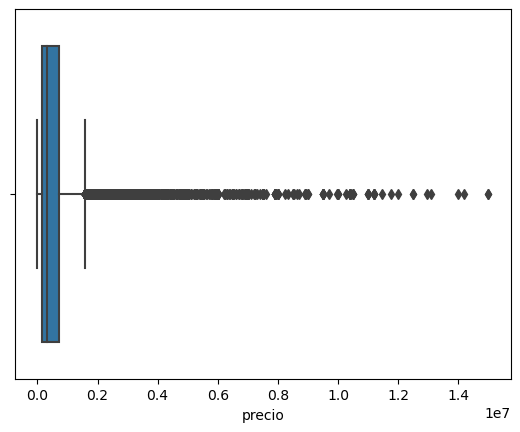

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=mad_total['precio'])
plt.show()

In [84]:
from faker import Faker

import random

faker = Faker()

ratings = [random.randint(1, 5) for _ in range(len(alquiler))]

ratings

[4,
 5,
 4,
 5,
 1,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 4,
 1,
 2,
 2,
 1,
 5,
 1,
 2,
 2,
 4,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 3,
 2,
 4,
 3,
 4,
 3,
 3,
 1,
 4,
 5,
 4,
 4,
 1,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 3,
 1,
 2,
 5,
 2,
 5,
 3,
 4,
 3,
 5,
 3,
 5,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 2,
 5,
 4,
 1,
 3,
 2,
 3,
 3,
 4,
 3,
 5,
 3,
 2,
 1,
 4,
 3,
 4,
 3,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 4,
 1,
 1,
 5,
 1,
 5,
 1,
 2,
 1,
 4,
 5,
 2,
 3,
 3,
 5,
 3,
 2,
 4,
 3,
 2,
 1,
 3,
 3,
 3,
 2,
 4,
 4,
 3,
 1,
 4,
 2,
 2,
 5,
 2,
 5,
 2,
 4,
 1,
 3,
 4,
 1,
 2,
 1,
 1,
 5,
 1,
 2,
 2,
 4,
 2,
 4,
 4,
 1,
 3,
 4,
 2,
 3,
 1,
 4,
 4,
 1,
 3,
 5,
 5,
 4,
 5,
 3,
 1,
 2,
 3,
 5,
 1,
 4,
 5,
 2,
 4,
 1,
 1,
 3,
 3,
 1,
 4,
 3,
 2,
 5,
 4,
 4,
 5,
 2,
 4,
 5,
 5,
 4,
 3,
 3,
 1,
 3,
 3,
 4,
 5,
 4,
 2,
 5,
 1,
 1,
 5,
 2,
 4,
 3,
 4,
 3,
 3,
 2,
 3,
 2,
 2,
 4,
 4,
 1,
 4,
 5,
 1,
 5,
 3,
 5,
 4,
 1,
 3,
 2,
 3,
 5,
 1,
 3,
 3,
 4,
 1,
 2,
 4,
 3,
 3,
 1,
 5,
 1,
 1,
 3,
 1,
 1,
 1,
 4,
 3,
 4,
 4,
 5,
 1,


In [85]:
#alquiler['rating'] = ratings

In [86]:
alquiler

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,zona_€/m2,precio_medio
0,4,int_arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674,1530.949664
1,0,int_arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674,1530.949664
2,0,int_arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674,1530.949664
3,4,int_arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674,1530.949664
4,0,int_arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674,1530.949664
...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,int_villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223,1022.743902
8178,3,int_villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223,1022.743902
8179,0,int_villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223,1022.743902
8180,0,int_villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223,1022.743902


In [87]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

In [ ]:
alquiler.to_csv('alquiler_limp.csv', index=False)

In [ ]:
mad_int.to_csv('mad_int_limp.csv', index=False)

In [ ]:
mad_ext.to_csv('mad_ext_limp.csv', index=False)

In [ ]:
mad_total.to_csv('mad_total_limp.csv', index=False)